# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2024/2025
## Assignment #3 - Multivariate EDA & Testing Procedures

***
### Group: B
### Names of members: Volha Stehling, Nhat Minh Phuong Nguyen, Kashf Jahangir

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://www.python.org), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=4709), especially L04 & L05.

**Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.**

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, November 19, 2024, 20:00 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, November 27, 2024, 10:00 - 13:00 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A03_Group_A.ipynb
2. RM_A03_Group_A.pdf

***
***

As a reminder of how to present and be critical with your results in this assignment: 

**Imagine you are a member of a climate research committee. Fellow scientists, journalists, and politicians are interested in your results and your critical scientific evaluation.**

#### Task 1 **[30 points] Correlation Analysis**

For this task, your goal is to perform a correlation analysis on the statistical measurement "[annual CO<sub>2</sub> emissions](https://ourworldindata.org/grapher/annual-co2-emissions-per-country?tab=chart&facet=none&country=~OWID_WRL)" and statistical measurements "mean temperature" and "precipitation" from the CRU climate dataset, with each year representing one data sample. You can download the data associated with the CO<sub>2</sub> emission plot using the link provided above (when accessing each URL, go to menu item _download_ right below the visualization plot).

For this task, use data from years 1901-2022 from the country/entity "WORLD" of each the CRU dataset and the CO<sub>2</sub> emission dataset.

1. Download and import the CO<sub>2</sub> emission dataset and merge the values with the data from the CRU dataset (grouped by year). The result should be a dataframe that contains the annual CO<sub>2</sub> emissions as well as mean temperature and precipitation for each respective year.
2. Create two scatter plots: One showing annual CO<sub>2</sub> emissions vs. mean temperature and the second showing annual CO<sub>2</sub> emissions vs. precipitation.
3. Fit linear regression models to the data used in the scatter plots (e.g., using the [scikit-learn library](https://scikit-learn.org/stable/index.html)) and add the two resulting regression lines to both scatter plots from the previous part of this task.
4. Calculate the Pearson's correlation coefficient for the measurements used in both scatter plots respectively and explain your result briefly.
5. Explain in your own words the following factors that have to be considered when interpreting a correlation coefficient: (A) non-linear relationship, (B) outliers, and (C) correlation vs. causality.

#### Task 1.1

In [1330]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

os.getcwd()
file_path = './data/CRU_data.csv'
dt = pd.read_csv(file_path, sep=";")
cru_data = pd.DataFrame(dt)

file_path = './data/annual-co2-emissions-per-country.csv'
dt = pd.read_csv(file_path, sep=",")
co2_data = pd.DataFrame(dt)
co2_data

cru = cru_data[(cru_data['COUNTRY'] == 'WORLD') & (cru_data['YEAR'] >= 1901) & (cru_data['YEAR'] <= 2022)].replace(-999, np.nan)
co2 = co2_data[(co2_data['Entity'] == 'World') & (co2_data['Year'] >= 1901) & (co2_data['Year'] <= 2022)]

yearly_data = []

tmp_mean_columns = ['TMP_MEAN_JAN', 'TMP_MEAN_FEB', 'TMP_MEAN_MAR', 'TMP_MEAN_APR', 'TMP_MEAN_MAY', 'TMP_MEAN_JUN',
                    'TMP_MEAN_JUL', 'TMP_MEAN_AUG', 'TMP_MEAN_SEP', 'TMP_MEAN_OCT', 'TMP_MEAN_NOV', 'TMP_MEAN_DEC']

prep_columns = ['PRECIP_JAN', 'PRECIP_FEB', 'PRECIP_MAR', 'PRECIP_APR', 'PRECIP_MAY', 'PRECIP_JUN',
                'PRECIP_JUL', 'PRECIP_AUG', 'PRECIP_SEP', 'PRECIP_OCT', 'PRECIP_NOV', 'PRECIP_DEC']

for year in range(1901, 2023):
    filtered_cru_row = cru.query("YEAR == @year")
    filtered_co2_row = co2.query("Year == @year")
    
    # Appending the dictionary for each year
    if not filtered_cru_row.empty:
        yearly_data.append({'Year': year,
                            'Mean Temp': filtered_cru_row[tmp_mean_columns].mean(axis=1).values.flatten()[0],
                            'Mean Precip': filtered_cru_row[prep_columns].mean(axis=1).values.flatten()[0],
                            'CO2 Emission': filtered_co2_row['Annual CO₂ emissions'].values.flatten()[0]})

# Converting the list of dictionaries to a DataFrame
yearly_df = pd.DataFrame(yearly_data)
yearly_df.head()

,Year,Mean Temp,Mean Precip,CO2 Emission
0,1901,13.058333,68.041667,2.023964e+09
1,1902,12.833333,67.308333,2.074800e+09
2,1903,12.866667,68.966667,2.262046e+09
3,1904,12.808333,68.333333,2.287509e+09
4,1905,12.875000,68.475000,2.437062e+09


#### Task 1.2

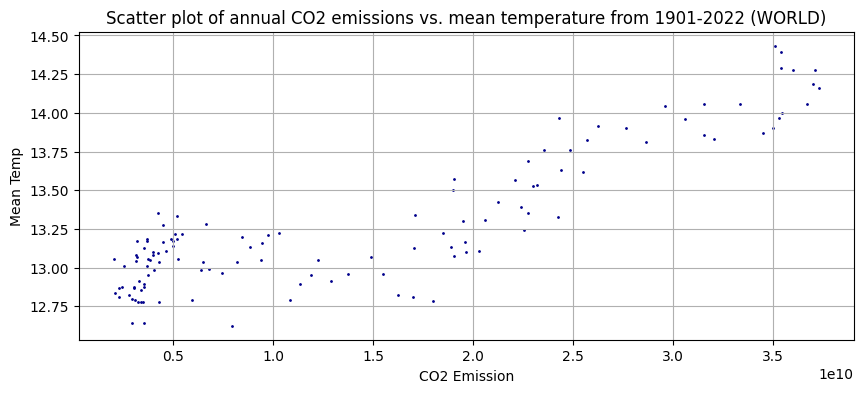

In [1333]:
plt.figure(figsize=(10, 4))
plt.scatter(yearly_df['CO2 Emission'], yearly_df['Mean Temp'], s=1, c='darkBlue', alpha=1)

# Customizations
plt.title('Scatter plot of annual CO2 emissions vs. mean temperature from 1901-2022 (WORLD)')
plt.xlabel('CO2 Emission')
plt.ylabel('Mean Temp')
plt.grid(True)
plt.show()

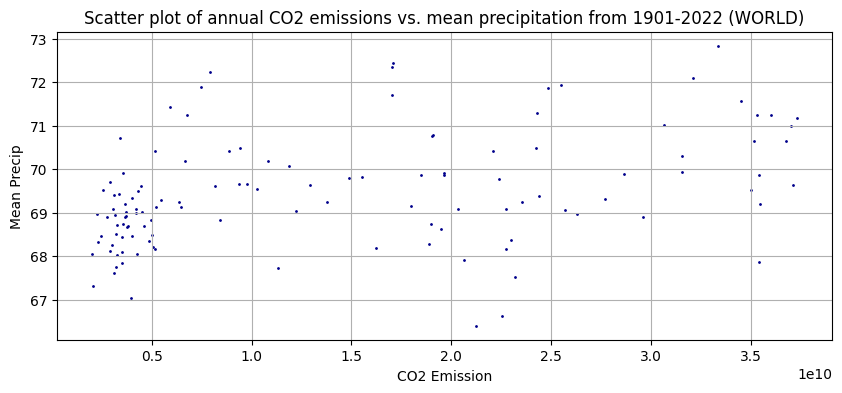

In [1335]:
plt.figure(figsize=(10, 4))
plt.scatter(yearly_df['CO2 Emission'], yearly_df['Mean Precip'],s=1, c='darkBlue', alpha=1)

# Customizations
plt.title('Scatter plot of annual CO2 emissions vs. mean precipitation from 1901-2022 (WORLD)')
plt.xlabel('CO2 Emission')
plt.ylabel('Mean Precip')
plt.grid(True)
plt.show()

#### Task 1.3

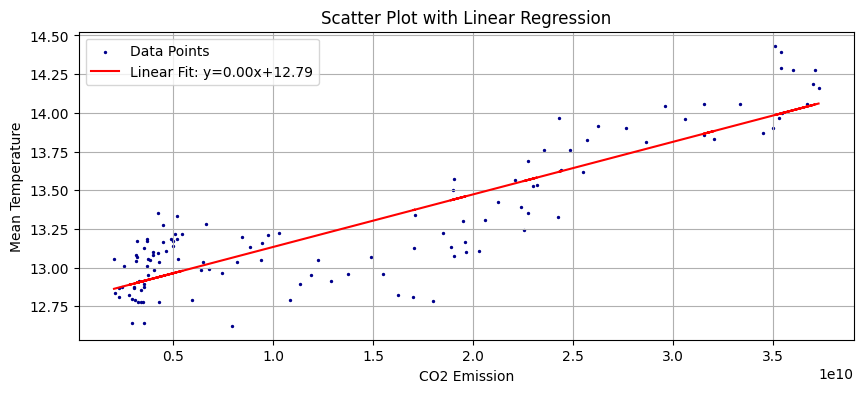

In [1338]:
x = np.array(yearly_df['CO2 Emission']).reshape(-1, 1)
y = np.array(yearly_df['Mean Temp'])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
plt.figure(figsize=(10, 4))
plt.scatter(x, y, color='darkBlue', s=2, label='Data Points')

# Plot regression line
plt.plot(x, y_pred, color='red', label=f'Linear Fit: y={model.coef_[0]:.2f}x+{model.intercept_:.2f}')

# Add labels and legend
plt.xlabel('CO2 Emission')
plt.ylabel('Mean Temperature')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

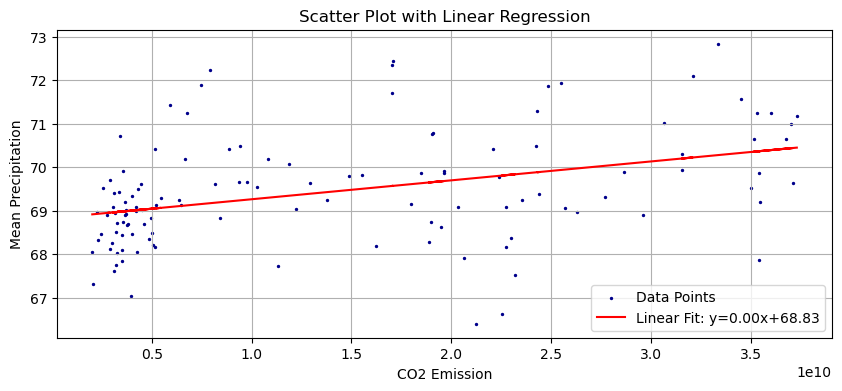

In [14]:
x = np.array(yearly_df['CO2 Emission']).reshape(-1, 1)
y = np.array(yearly_df['Mean Precip'])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
plt.figure(figsize=(10, 4))
plt.scatter(x, y, color='darkBlue', s=2, label='Data Points')

# Plot regression line
plt.plot(x, y_pred, color='red', label=f'Linear Fit: y={model.coef_[0]:.2f}x+{model.intercept_:.2f}')

# Add labels and legend
plt.xlabel('CO2 Emission')
plt.ylabel('Mean Precipitation')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

#### Task 1.4

In [17]:
x = np.array(yearly_df['CO2 Emission'])
y = np.array(yearly_df['Mean Temp'])

corr_coef = np.corrcoef(x, y)[0, 1]
print("Pearson's correlation coefficient for CO2 Emission vs. Mean Temperature: ", corr_coef)

Pearson's correlation coefficient for CO2 Emission vs. Mean Temperature:  0.8730091821803742


The correlation coefficient $r$, indicates the strength of linear relation between two variables. The value of $r$ for relation between CO$_2$ emissions and mean temperature is closer to 1. This indicates that there is a strong positive correlation i.e. with increase in CO$_2$ emissions, mean temperature increases as well. This also means that there is a strong linear relation between the two variables.

In [18]:
y = np.array(yearly_df['Mean Precip'])
corr_coef = np.corrcoef(x, y)[0, 1]
print("Pearson's correlation coefficient for CO2 Emission vs. Mean Precipitation: ", corr_coef)

Pearson's correlation coefficient for CO2 Emission vs. Mean Precipitation:  0.3876784208151818


The value for $r$, in this case, is closer to 0 than it is to 1 which indicates _weak_ positive correlation. This shows that while there is a linear relationship that exists, it is weaker and more inconsistent.

### Task 1.5

| No. | Factor        | Meaning of correlation coefficient        | What can be done |
|----------|--------------------------------------------------------|---------------------------------------------------------|---------------------|
| 1        | Non-linear Relationship| Correlation coefficients are used to indicate strength of a linear relationship between two variables. In case there is no linear relationship that exists, the value for the coefficient will be closer to 0 | In this case, we can use scatterplots to visualize the data and determine whether or not there is a strong non-linear relationship that exists. |
| 2        | Outliers | text ||
| 3        | Correlation vs. Causality | text||

#### Task 2 **[30 points] Hypothesis Testing**

Imagine you want to determine whether global monthly mean temperatures are increasing using the number of warmer and colder months (with respect to the same month 50 years ago, as calculated in Assignment 2) as sample data.
1. State hypotheses $H_0$ and $H_1$ and briefly evaluate whether they're testable and falsifiable.
2. Define both type 1 ($\alpha$) and type 2 ($\beta$) error for the given hypotheses. What is the meaning and what would be the consequence of these errors given your hypotheses?
3. Is the hypothesis test you would perform to answer the given question one-sided or two-sided? Briefly explain your choice.
4. Define the term "statistical power" and its characteristics with respect to the given research question.
5. Apart from the CO<sub>2</sub> emissions as explored in Task 1, which other extraneous factors may also influence the difference of monthly mean temperatures?

### 1. State hypotheses $H_0$ and $H_1$ and briefly evaluate whether they're testable and falsifiable.

**Null Hypothesis ($H_0$):**
The mean monthly temperature has not increased over the past 50 years (any observed differences are due to random variability).

**Alternative Hypothesis ($H_1$):**
The mean monthly temperature has increased over the past 50 years (evidence supports a systematic warming trend).

This is a one-tailed hypothesis, as we are only interested in an increase in temperature.

#### Evaluation of Testability and Falsifiability

**Testability:**
A hypothesis is testable if it can be supported or refuted using observable data and established methods of analysis.

$H_0$ and $H_1$ are testable because we have quantitative data: historical monthly mean temperatures spanning the last 50 years for the specified countries and months. Statistical tests, such as paired t-tests or binomial tests, can be applied to the data to evaluate the significance of temperature changes.

**Falsifiability:**
A hypothesis is falsifiable if there exist observations or experimental results that can disprove it.

Both $H_0$ and $H_1$ are falsifiable.

$H_0$ can be falsified if we observe a statistically significant increase in mean temperatures,  with a p-value less than or equal to the predefined significance threshold (p-value $\le \alpha$), i.e., there exist observations of a mean temperature increase that contradict the assumption that any differences are due purely to random variability under $H_0$.

$H_1$ can be falsified if there is no statistically significant evidence for an increase in temperatures (i.e., p-value > $\alpha$), or if data show no consistent warming trend (e.g., a mix of colder and warmer months with no systematic pattern).

### 2. Define both type 1 ($\alpha$) and type 2 ($\beta$) error for the given hypotheses. What is the meaning and what would be the consequence of these errors given your hypotheses?

Though there are typical values that are often set by convention, $\alpha$ and $\beta$ should ideally be defined based on the data and the context of the analysis.

**$\alpha$ (Type I Error)** is the probability of rejecting $H_0$ when $H_0$ is true. <br>
Occurs when we incorrectly conclude that global temperatures are increasing when they are not. <br>
Probability: 5% (default $\alpha$ = 0.05).

$\alpha$ is typically predefined by convention or study requirements, often set at 0.05. When setting $\alpha$ in a data-driven way, we consider the consequences of a false positive. If the stakes are high (e.g., making unwarranted claims about climate change), we might set $\alpha$ lower (e.g., 0.01). However, an excessively low $\alpha$ increases $\beta$, making it harder to detect real effects.

**$\beta$ (Type II Error)** is the probability of failing to reject $H_0$ when $H_1$ is true. <br>
Occurs when we fail to detect an increase in global temperatures when it actually exists.

$\beta$ is determined by:

1. Effect Size ($\delta$): The magnitude of the expected temperature increase (e.g., how much warming is meaningful in the context of the study).

2. Sample Size ($N$): The amount of data available (e.g., years and months in the dataset).

3. Variability ($\sigma$): The standard deviation of monthly temperatures over time.

4. Significance Level ($\alpha$): Lower $\alpha$ makes $\beta$ larger, and vice versa.

To compute $\beta$ we use statistical software to calculate the power of the test $(1 - \beta)$.

In [3]:
# A bit of duplicated code due to division of labour, and to be on a safe side.
import pandas as pd

data = pd.read_csv("./data/CRU_data.csv", sep=";")

In [4]:
# Filter data for Pakistan and Spain from 1964 onward (current data)
current_data = data[(data["COUNTRY"].isin(["PAKISTAN", "SPAIN"])) & (data["YEAR"] >= 1964)]

# Filter reference data for 50 years earlier
reference_data = data[(data["COUNTRY"].isin(["PAKISTAN", "SPAIN"])) & (data["YEAR"] >= 1914) & (data["YEAR"] < 1964)]

# Create a copy of the reference data and adjust years for alignment
reference_data = reference_data.copy()
reference_data["YEAR"] += 50  # Align reference years with current years

# Merge current and reference data
comparison_data = pd.merge(
    current_data,
    reference_data,
    on=["COUNTRY", "YEAR"],
    suffixes=("_current", "_reference")
)

# Define monthly columns to compare
monthly_columns = [f'TMP_MEAN_{month}' for month in 
                   ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]]

# Counts for warmer and colder months
warmer_months = 0
colder_months = 0

# Calculate warmer and colder months for each monthly column
for col in monthly_columns:
    # Compute temperature differences
    comparison_data[f"{col}_diff"] = (
        comparison_data[f"{col}_current"] - comparison_data[f"{col}_reference"]
    )
    # Count warmer and colder months
    warmer_months += (comparison_data[f"{col}_diff"] > 0).sum()
    colder_months += (comparison_data[f"{col}_diff"] < 0).sum()

final_counts = {
    "Warmer Months": warmer_months,
    "Colder Months": colder_months
}

print("Final Counts:")
print(final_counts)

# The merged and processed comparison data
#comparison_data.to_csv("./data/comparison_data.csv", sep=";", index=False)

Final Counts:
{'Warmer Months': 757, 'Colder Months': 410}


In [5]:
#comparison_data

In [6]:
from statsmodels.stats.power import TTestIndPower

# Perform a one-sided power analysis for the hypothesis test
power_analysis = TTestIndPower()

# We assume a smaller effect size since global temperature trends are gradual
effect_size = 0.2  # Small effect size (Cohen's d)
alpha = 0.05  # Significance level (Type 1 error rate)
n_obs = len(comparison_data)  # Number of observations (sample size)

# Calculate power for a one-sided test (warming trend)
power = power_analysis.solve_power(effect_size=effect_size, nobs1=n_obs, alpha=alpha, alternative='larger')

# Calculate beta
beta = 1 - power

# Summarize results
temperature_increase_hypothesis = {
    "Significance Level (alpha)": alpha,
    "Type 2 Error Rate (beta)": round(beta, 3),
    "Power (1 - beta)": round(power, 3)
}

temperature_increase_hypothesis

{'Significance Level (alpha)': 0.05,
 'Type 2 Error Rate (beta)': 0.593,
 'Power (1 - beta)': 0.407}

The results for the hypothesis test to determine whether global monthly mean temperatures are increasing:

**Significance Level ($\alpha$): 0.05 (5%).** There is a 5% chance of concluding warming when no warming exists. <br>
Probability of incorrectly concluding that global temperatures are increasing when they are not.

**Consequence:** <br>
- This would lead to false alarms about global warming.
- Policymakers, scientists, and the public may overreact, allocating resources and enacting measures to address a non-existent warming trend.
- Credibility of climate research could be questioned if repeated false conclusions are made.

**Reducing $\alpha$:** <br>
- Reducing the significance level (e.g., from 0.05 to 0.01) decreases the likelihood of Type 1 errors but increases the likelihood of Type 2 errors.
- This makes the test more conservative, requiring stronger evidence to detect warming trends.

**Type 2 Error Rate ($\beta$): ~0.593 (59.3%).**  There is a 59.3% chance of missing a real warming trend. <br>
Probability of failing to detect an actual increase in global temperatures when it exists. <br>
The high $\beta$ indicates the test may lack sensitivity to detect smaller trends, risking delayed action against actual global warming.

**Consequence:** <br>
- This would lead to a missed detection of actual global warming.
- Governments and organizations might fail to implement necessary policies to mitigate climate change, leading to long-term environmental, economic, and societal harm.
- The opportunity to take timely action to combat climate change could be lost.

**Reducing $\beta$:**

Reducing $\beta$ (or increasing power) decreases the likelihood of Type 2 errors by improving the test's sensitivity. This can be achieved by:
- Increasing sample size (more years or countries).
- Using more precise measurements to reduce variability.
- Considering larger effect sizes (detecting stronger trends).

These results suggest that the test has limited power to detect small effects (e.g., gradual warming trends) with the current sample size and parameters.

**Power ($1 - \beta$): 0.407 (40.7%).** Probability of correctly detecting an increase in global temperatures when it exists.

### 3. Is the hypothesis test you would perform to answer the given question one-sided or two-sided? Briefly explain your choice.

The hypothesis test to determine whether global monthly mean temperatures are increasing would be a **one-sided test**. That is because the task specifically asks whether global temperatures are increasing, not whether they are changing in any direction (e.g., increasing or decreasing). Since we are only interested in detecting an **increase in temperatures**, a one-sided test is appropriate. A two-sided test would check for both increases and decreases in temperature, requiring stronger evidence to reject the null hypothesis in either direction.


### 4. Define the term "statistical power" and its characteristics with respect to the given research question.

**Statistical power** is the probability of correctly rejecting the null hypothesis ($H_0$) when the alternative hypothesis ($H_1$) is true. In other words, it measures the likelihood of detecting an effect (i.e., an increase in global temperatures) when it actually exists. In the context of determining whether global monthly mean temperatures are increasing, statistical power is the likelihood of detecting a true warming trend. Ensuring sufficient power is crucial to avoid missing real temperature increases ($1 - \beta$), as this could have significant environmental and societal implications.

Mathematically: $Power = 1 - \beta$, where $\beta$ is the Type 2 error rate, the probability of failing to reject $H_0$ when $H_1$ is true.

High statistical power is desirable. A test with high power is more likely to detect an actual increase in global temperatures, reducing the chance of a Type 2 error.

**Power Depends on Several Factors:**
- **Sample Size ($n$).** Larger sample sizes increase power by reducing the variability of the data. In this context, using data from more years or countries improves power.
- **Effect Size ($d$).** Larger effect sizes (e.g., greater warming trends) are easier to detect, increasing power. For global temperature trends, the effect size may be small ($d = 0.2$) due to the gradual nature of warming.
- **Significance Level ($\alpha$).** A higher $\alpha$ (e.g., 0.1 instead of 0.05) increases power but raises the risk of a Type 1 error.
- **Data Variability ($\sigma$).** Lower variability in global temperature measurements increases power. Using precise temperature records or averaging over larger areas reduces noise in the data.
- **Test Type (One-Sided vs. Two-Sided).** A one-sided test (focused on warming) is more powerful than a two-sided test, as it allocates all the significance level ($\alpha$) to detecting increases.

### 5. Apart from the CO<sub>2</sub> emissions as explored in Task 1, which other extraneous factors may also influence the difference of monthly mean temperatures?

Apart from CO<sub>2</sub> emissions, several other factors can significantly influence the differences in monthly mean temperatures. These factors arise from natural climate variability, human activities, localized phenomena, and long-term planetary cycles, all of which can interact in complex ways to impact global and regional temperatures.

**Natural climate variability** plays a crucial role. The El Niño-Southern Oscillation (ENSO), a periodic warming (El Niño) or cooling (La Niña) of the Pacific Ocean, significantly affects global temperature patterns. For example, El Niño years are associated with higher global temperatures. Similarly, volcanic activity can temporarily cool the Earth by injecting aerosols into the stratosphere, which reflect sunlight. A notable instance of this was the eruption of Mount Pinatubo in 1991, which caused a measurable short-term cooling. Additionally, variations in solar activity, such as changes in sunspot cycles, can influence global temperatures. For example, a prolonged solar minimum can slightly reduce temperatures.

**Anthropogenic factors** also contribute to temperature differences. Changes in land use, such as urbanization, deforestation, and agriculture, alter the Earth’s reflectivity and heat retention. Urban areas, for example, experience higher temperatures due to reduced vegetation and increased heat absorption, known as the urban heat island effect. Other greenhouse gases like methane (CH<sub>4</sub>) from livestock and nitrous oxide (N<sub>2</sub>O) from fertilizers further contribute to warming. Additionally, industrial aerosols like sulfates can offset warming by reflecting sunlight, as seen during the mid-20th century when aerosol cooling counteracted some greenhouse gas-induced warming.

**Localized and regional factors** also influence monthly mean temperatures. Changes in ocean currents, such as the Gulf Stream, play a key role by transporting heat across the globe. For instance, a slowdown in the Atlantic Meridional Overturning Circulation (AMOC) could cool Europe despite global warming trends. Seasonal variations in solar exposure, snow cover, and vegetation cycles also contribute to temperature fluctuations, as do topographical features like mountain ranges, which influence air circulation and temperature gradients.

Feedback mechanisms further amplify these changes. **Melting ice and snow** reduce the Earth’s reflectivity, causing more heat absorption and accelerating warming, a phenomenon known as Arctic amplification. Similarly, as the atmosphere warms, it can hold more water vapor, a potent greenhouse gas, which amplifies the warming trend. Changes in cloud cover also play a dual role, as some clouds reflect sunlight and cool the Earth, while others trap heat and contribute to warming.

On longer timescales, **extraterrestrial factors** like Earth’s orbital changes (Milankovitch cycles) influence climate over tens of thousands of years, driving glacial and interglacial periods. Rare events like asteroid impacts can also drastically alter temperatures by injecting dust and aerosols into the atmosphere, causing temporary cooling.

In conclusion, while CO<sub>2</sub> emissions are a dominant driver of long-term global warming, natural climate variability, human activities, regional factors, feedback mechanisms, and planetary cycles also play significant roles in shaping monthly mean temperature differences. Understanding these extraneous factors is essential for accurately interpreting and predicting climate changes.

#### Task 3 **[40 points] Time Series Analysis**

Your goal for this task is to do a time series analysis on two unknown time series. You can download the two series through an API call (see below). <br>
<b>Please note the following things:</b>

- The data server will always return slightly <b>different data</b> on each API call!
- You can use the code below to retrieve the data once(!), save the data into a file, share it with your team members, and then use the file for further analysis. This way everyone in the group is always working on the same data.
- Submit the data file, <b>including the retrieval date</b> (as shown in the example code), so that we can see what data you have based your analysis on. 
- The example code does not have to be submitted (i.e., you can delete it once you have the data saved). 

On the retrieved data, please perform the following analysis:
1. Plot the two time series so that they can be visually compared. Analyze them visually and state some first hypotheses based on your visual analysis.
2. Perform smoothing on each time series and plot the smoothed series together with the original. Make sure the viewer can clearly recognize which line is the smoothed one. For the smoothing procedure, choose a method and window size $n$ that makes most sense to you. Explain and evaluate your choice briefly.
3. Using appropriate statistics, analyze both time series to look for the following: (A) trend, (B) cyclic variation, and (C) cross correlations. For each feature, explain what the analysis has shown.
4. Revisit your first hypotheses from Task 3.1 and interpret all findings from Task 3.2 and Task 3.3 in the light of your first ideas. How has your first impression changed? What have you been able to show through your analysis? What do the results mean in terms of predictive power?      

##### **Code for data retrieval** (can be removed once the data file is generated):

In [1235]:
# Get time series
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.signal import detrend
from statsmodels.graphics.tsaplots import plot_acf
# Constants for the server access
# SERVER = "http://134.100.12.180:8080"
# HEADERS = {"Accept": "application/json"}

# # Retrieve data and store body in data frame
# data = {}
# result = requests.get(f"{SERVER}/gettimelines/", headers=HEADERS)
# if result.status_code != 200:
#     print(
#         f"Error while accessing the data generator: {result.json()['detail'][0]['msg']}"
#     )
# else:
#     data["data"] = json.loads(result.json()["data"])
#     data["date"] = result.json()["date"]

# data_df = pd.DataFrame(data["data"])
# data_df.head()

In [1237]:
# # Save data as file
# csv_header = f"Data retrieved on: {data['date']}\n"

# with open("data/A03_data.csv", "w") as f:
#     f.write(csv_header)
#     data_df.to_csv(f)

### TASK 3.1

In [1342]:
# Load data from file
plt.rcParams['figure.figsize'] = [12,8]
df = pd.read_csv("data/A03_data.csv", header = 1)
df.columns = ['Time', 'T1', 'T2']
df

,Time,T1,T2
0,0,27.194257,13.715628
1,1,27.436994,14.142669
2,2,24.859227,16.593996
3,3,28.504127,16.854353
4,4,23.997294,19.045406
...,...,...,...
195,195,27.012593,16.346528
196,196,29.483604,15.725118
197,197,24.635992,20.108892
198,198,29.875983,16.453119


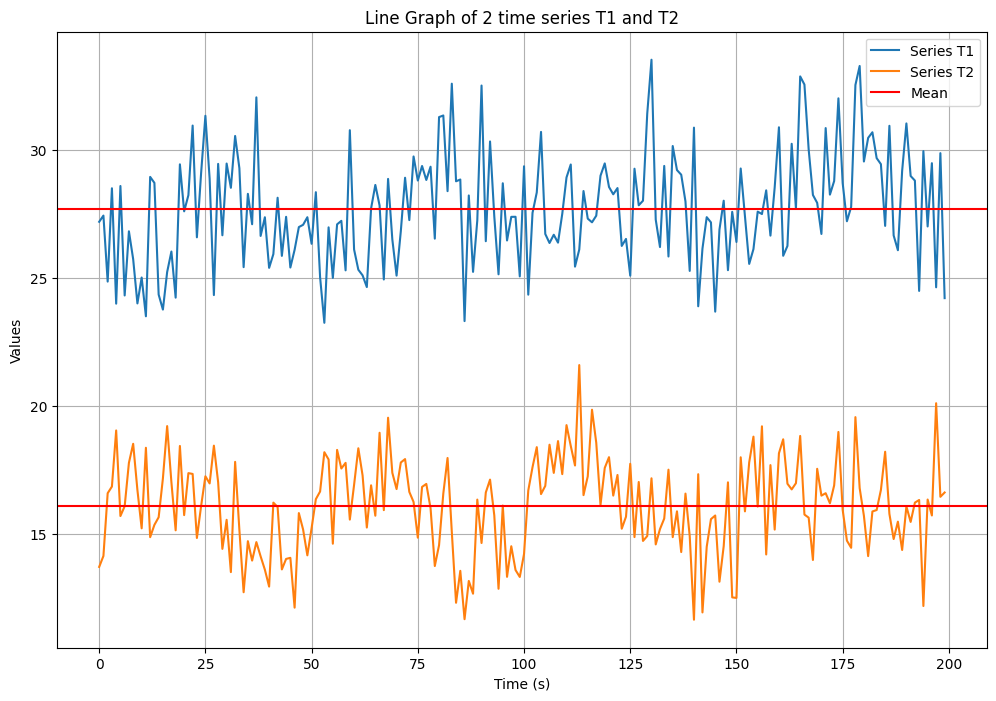

In [1344]:

# plt.figure(figsize=(12, 8))
mean_T1 =  df['T1'].mean()
mean_T2 =  df['T2'].mean()
plt.title('Line Graph of 2 time series T1 and T2')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.plot(df['T1'], label='Series T1')
plt.plot(df['T2'], label='Series T2')
plt.axhline(y=mean_T1, label='Mean', c='red')
plt.axhline(y=mean_T2, c='red')
plt.legend()
plt.grid()
plt.show()

| No. | Hypothesis                                                                                     | Notes                                     |
|----------|-----------------------------------------------------------------------|----------------------------------------------------------------------|
| 1        | Over the time, the value of T2 is always smaller than T1's.| This can be spotted visually when the max value of T2 is approximately 21 and T1's minimum value is 23 and the 2 lines are lying separately on 2 halfs of the chart.|
| 2        | Over the given time, T1 and T2 are independent and do not share a correlation. | I did not see any shared patterns or correlation from the chart. |
| 3        | Series T2 has periodic spikes through the time | I can roughly see 4 periods where T2 series spikes.|

### Task 3.2



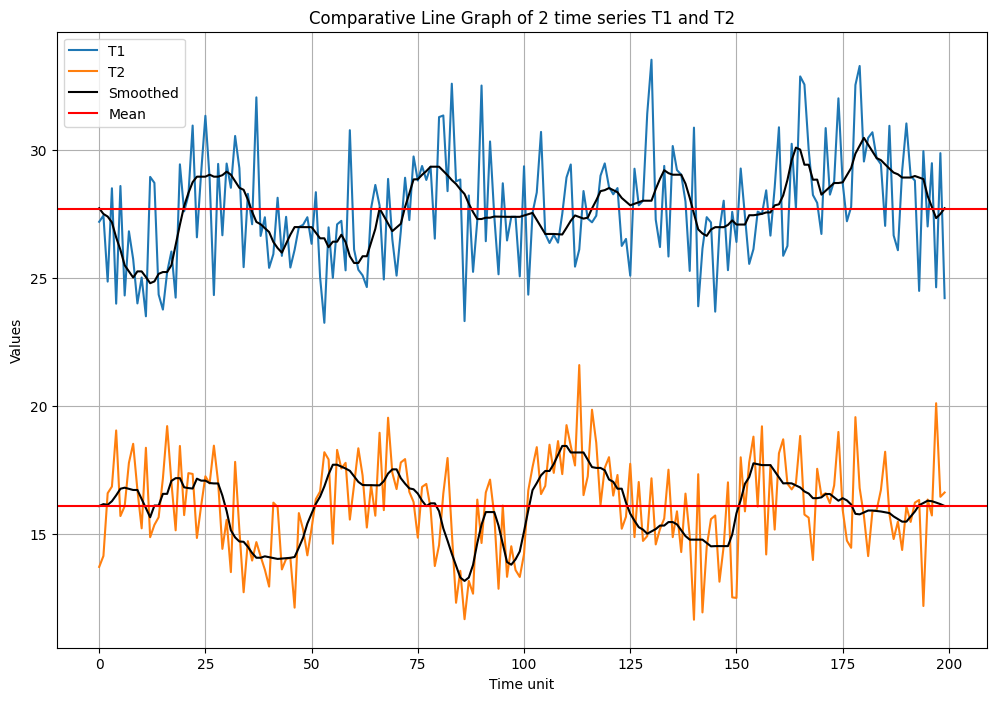

In [1348]:
def mean_smoothing(data, window_size):
    res = data.rolling(window=window_size, center=True).mean()
    return res.replace(np.nan, data.mean()) #Replacing Nan with the total's mean value

def median_smoothing(data, window_size):
    res = data.rolling(window=window_size, center=True).median()
    return res.replace(np.nan, data.median()) #Replacing Nan with the total's median value

df['T1_resmooth'] =  mean_smoothing(median_smoothing(df['T1'], 7), 3)
df['T2_resmooth'] =  mean_smoothing(median_smoothing(df['T2'], 7), 3)


# plt.figure(figsize=(12, 9))
indices = list(range(len(df['T1'])))
plt.plot(df['T1'], label='T1')
plt.plot(df['T2'], label='T2')

plt.plot(indices, df['T1_resmooth'], color='black')
plt.plot(indices, df['T2_resmooth'], label='Smoothed', color='black')


plt.title('Comparative Line Graph of 2 time series T1 and T2')
plt.axhline(y=mean_T1, label='Mean', c='red')
plt.axhline(y=mean_T2, c='red')
plt.xlabel('Time unit')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

| Chosen window size | Reason               | Note |                                                                                         
|--------------------|----------------------|-------|
| 3      | Symmetry | 3 is an odd number, so that we have a middle value and we can perform our smoothing around that value.|
| 3      | Local feature | I do not want to completely ignore local features so I chose a small window size for the mean re-smoothing. You can still see that T1 has choppy, rougher line comparing to T2. If I increase the window size, this feature will be lost.|
| 7      | Global feature | With this window size, I can easily spot out the global trends of the two time series.|




| Chosen smoothing method | Reason               | Note |                                                                                    
|--------------------|----------------------|-------|
|Mean    | Readability |In this case, I used mean smoothing to smooth out the mesas areas (flatted areas)|
|Median    | Edge value preservation |Median smoothing usually has sharper results, it shows the sharp transitions between value clearer comparing to mean smoothing|


### Task 3.3

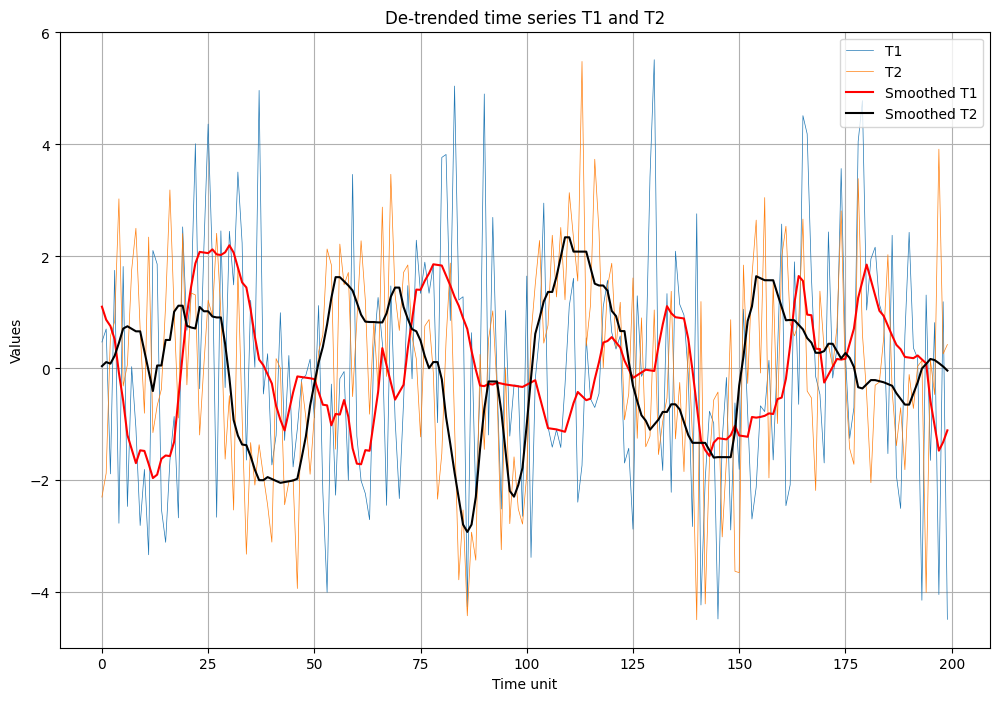

In [1353]:
#De-trend a time series
# detrended_series = df.diff().dropna()
detrended_T1 = detrend(df['T1'])
detrended_T2 = detrend(df['T2'])
detrended_ST1 = detrend(df['T1_resmooth'])
detrended_ST2 = detrend(df['T2_resmooth'])

# detrended_df = pd.DataFrame(detrend(df), index=df.index, columns=['Time', 'T1','T2','T1_sm','T2_sm'])
# detrended_df
# df

# #Plot the detrended time series

plt.plot(detrended_T1, label='T1', linewidth=0.5)
plt.plot(detrended_T2, label='T2', linewidth=0.5)

plt.plot(detrended_ST1, label='Smoothed T1', color='red')
plt.plot(detrended_ST2, label='Smoothed T2', color='black')
plt.title('De-trended time series T1 and T2')
plt.xlabel('Time unit')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [1586]:
#Calculate the Pearson Correlation Coefficient

dt_df = pd.DataFrame({
    'T1': detrended_T1,
    'T2': detrended_T2,
    'T1_sm': detrended_ST1,
    'T2_sm': detrended_ST2
})


corr1 = dt_df['T1'].corr(dt_df['T2'])
print(f"The correlation coefficient between T1 and T2 = {corr1:.4f}")

corr3 = df['T1'].corr(df['Time'])
print(f"The correlation coefficient between T1 and Time = {corr3:.4f}")

corr4 = df['T2'].corr(df['Time'])
print(f"The correlation coefficient between T2 and Time = {corr4:.4f}")


The correlation coefficient between T1 and T2 = -0.0137
The correlation coefficient between T1 and Time = 0.2639
The correlation coefficient between T2 and Time = 0.0289


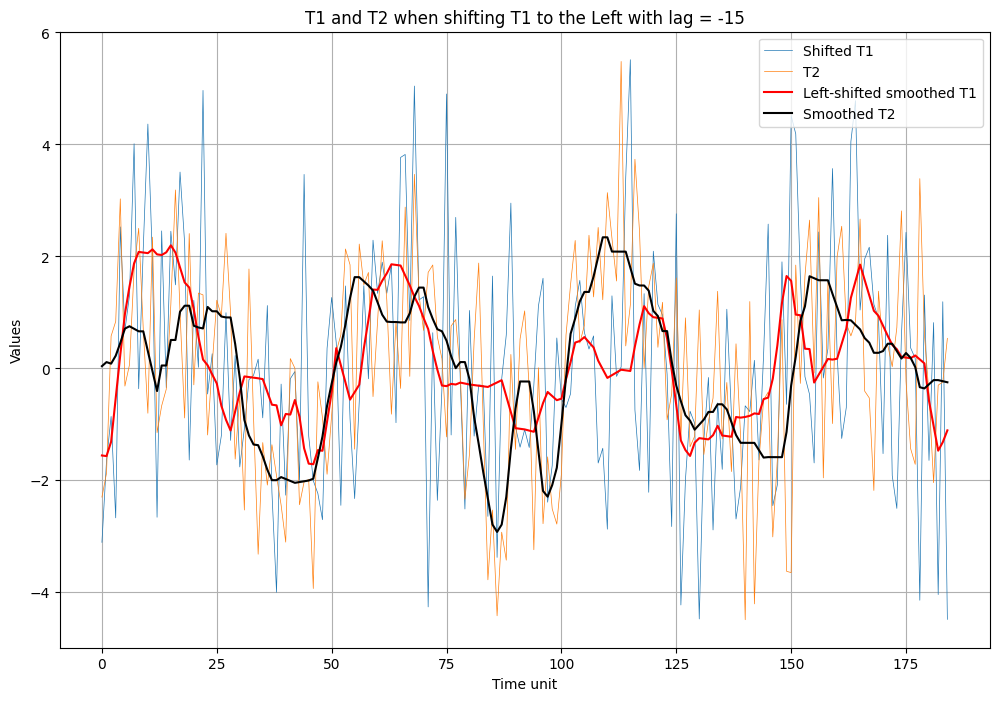

In [1695]:
periods = -15
shifted_1 = dt_df['T1'].shift(periods=periods).dropna()
shifted_1m = dt_df['T1_sm'].shift(periods=periods).dropna()

sf = pd.DataFrame({
    's1': shifted_1.values,
    'T2': dt_df['T2'].iloc[:periods].values,
    's1_sm': shifted_1m.values,
    'T2_sm': dt_df['T2_sm'].iloc[:periods].values
})

plt.plot(sf['s1'], label='Shifted T1', linewidth=0.5)
plt.plot(sf['T2'], label='T2',linewidth=0.5)
plt.plot(sf['s1_sm'], label='Left-shifted smoothed T1', color='red')
plt.plot(sf['T2_sm'], label='Smoothed T2', c='black')
plt.title('T1 and T2 when shifting T1 to the Left with lag = -15')
plt.xlabel('Time unit')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [1693]:
val = shifted_1.corr(sf['T2'])
print(f"The correlation coefficient between shifted T1 and T2 = {val:.4f} for periods = {periods}")

The correlation coefficient between shifted T1 and T2 = 0.0195 for periods = -50


| T1 shifted period | correlation coefficient                                       |Description|
|----------|-----------------------------------------------------------------------|---|
|  -10       |0.1553| This one is quite close to 0 => weak correlation|
|  -15       |0.1753| The correlation seems to increase when I shift T1 gradually (increase the lag)|
|  -20       |0.0732| After the peak correlation, the correlation starts decreasing|
|-25| -0.743||
|-30| -0.1||


    

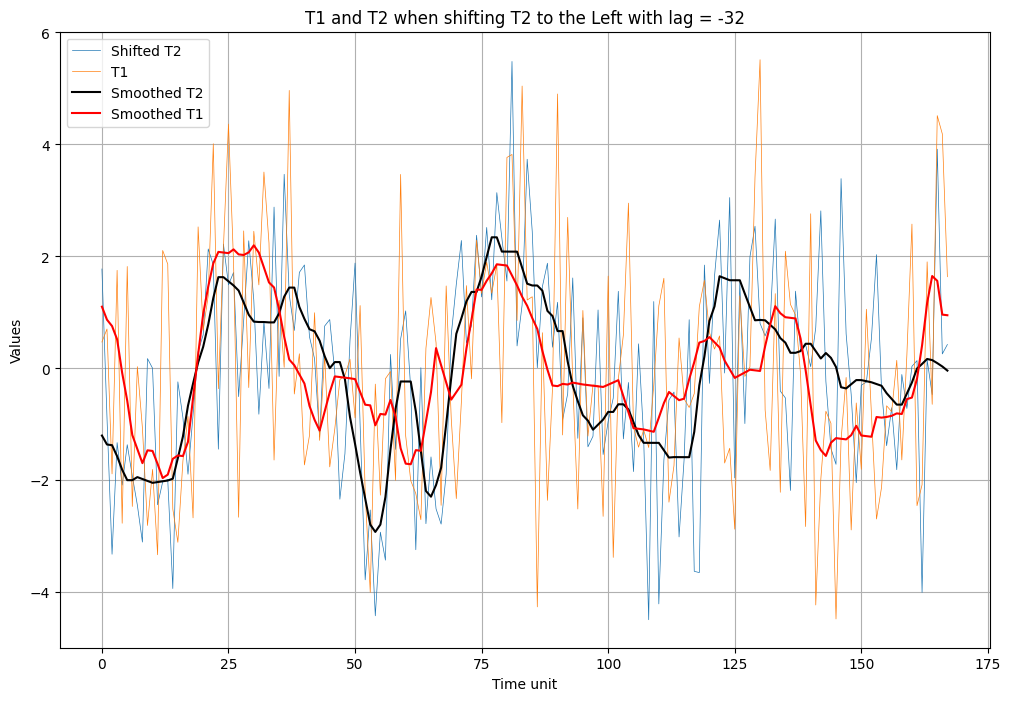

In [1682]:
shift_t2_lag=-32
shifted_2m = dt_df['T2_sm'].shift(periods=shift_t2_lag).dropna()
shifted_2 = dt_df['T2'].shift(periods=shift_t2_lag).dropna()

sf = pd.DataFrame({
    's2': shifted_2.values,
    'T1': dt_df['T1'].iloc[:shift_t2_lag].values,
    's2_sm': shifted_2m.values,
    'T1_sm': dt_df['T1_sm'].iloc[:shift_t2_lag].values
})
plt.plot(sf['s2'], label='Shifted T2', linewidth=0.5)
plt.plot(sf['T1'], label='T1',linewidth=0.5)

plt.plot(sf['s2_sm'], label='Smoothed T2', c='black')
plt.plot(sf['T1_sm'], label='Smoothed T1', c='red')
plt.title('T1 and T2 when shifting T2 to the Left with lag = -32')
plt.xlabel('Time unit')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [1676]:
val_t2 = shifted_2.corr(sf['T1'])
print(f"The correlation coefficient between shifted T2 and T1 = {val_t2:.4f} for periods = {shift_t2_lag}")

The correlation coefficient between shifted T2 and T1 = 0.3158 for periods = -32


| T2 shifted period | correlation coefficient                                       |Description|
|----------|-----------------------------------------------------------------------|--------|
|  -10       |-0.26| This is a quite noticable negative correlation. When T1 goes up, T2 goes down|
|  -20       |-0.1221| The correlation starts decreasing (getting closer to 0)|
|-32| 0.3158|The correlation seems to peak at lag = -32 (shifting T2 32 time unit to the left)|
|-35| 0.2516|The correlation starts decreasing again after the peak at lag = -32|


    

>From the 2 line charts showing the T1 and T2 values when shifting one of them to the left. We see that shifting T2 seems to result in greater correlation (0.315 at lag -32 and -0.26 at lag = -10), comparing to shifting T1 to the left (0.175 with lag = -15). From this observation, we can see that there are a moderate chance that T1 is the indicator of T2. T1(i) and T2(i+10/i+32) (with i is a point in time) has considerable correlation.

#### Plotting Autocorrelation Function

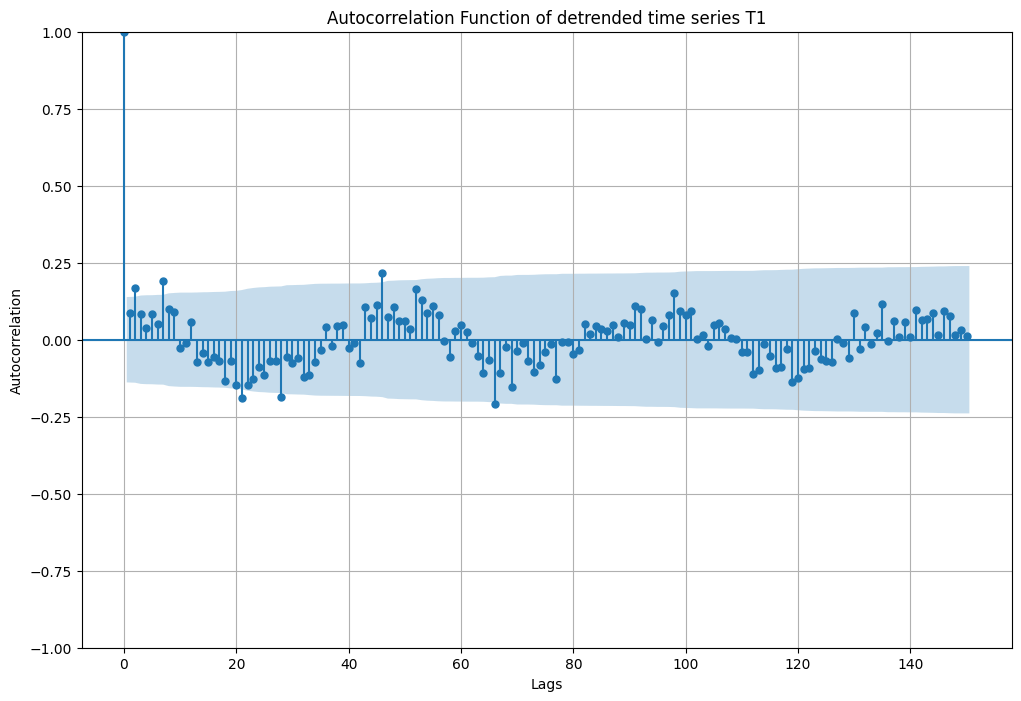

In [1320]:
#Plotting detrended T1 series
plot_acf(dt_df['T1'], lags = 150)
plt.title('Autocorrelation Function of detrended time series T1')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid()

plt.show()

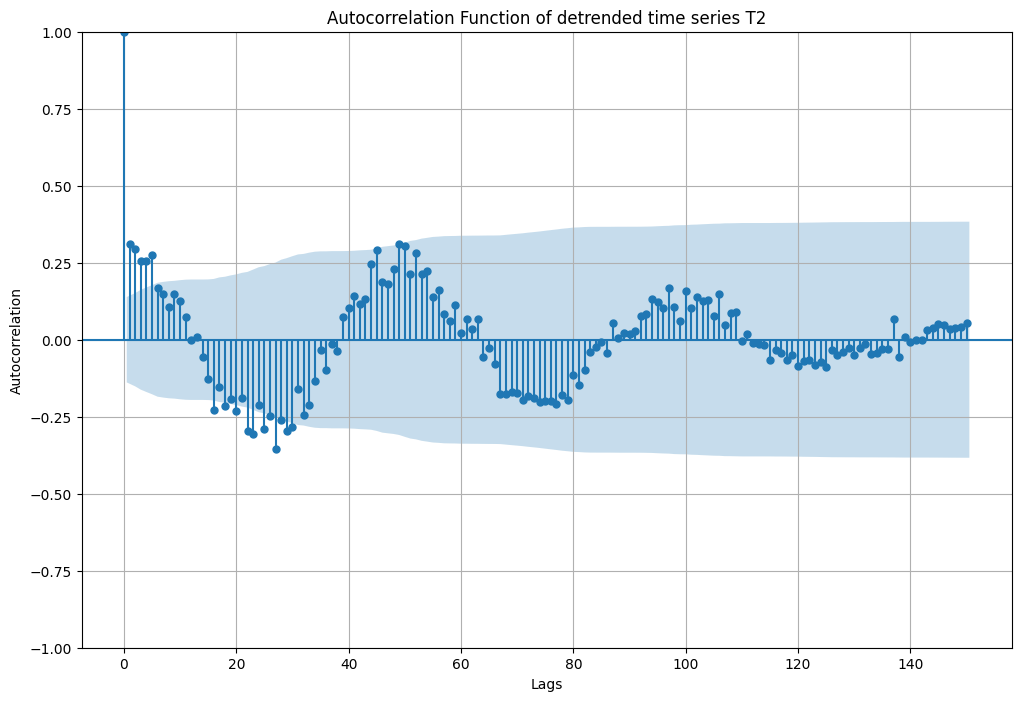

In [1322]:
#Plotting detrended T2 series
plot_acf(dt_df['T2'], lags = 150)
plt.title('Autocorrelation Function of detrended time series T2')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

| Feature | Summary / Key findings                                                                                     |
|----------|-----------------------------------------------------------------------|
|  Cross Correlations   |After the de-trending, we could still spot out the 4 spikes of T2 series.<br> At the same point in time, the two series do not seem to have strong correlation (only about <b>-0.0137</b>). <br>However, after trying out different lags by shifting one time series (either T1 or T2) then calculating its correlation with the other series, we found out that they have a <b>peak</b> correlation of approximate <b>~0.3158</b> when <b> shifting T2 to the left</b>, this indicates a potential correlation between the 2 time series| 
|  Trend   |We calculated the correlation between T1 T2 and the time and we see that they have a very slight positive linear trend (0.2 for T1 and 0.02 for T2). It means T1's values tend to increase by ~20% over the time, while T2's values seem to fluctuate around a flat line (or trend)| 
|  Cyclic Variation   |There is a visible periodic cycle for both time series. However, we can see that T1 has a weaker autocorrelation comparing to T2. We could also spot out this feature from the smoothing diagram, the cycle in T2 is visually clearer and smoother.| 

### Task 3.4


| No. | My first hypothesis                                                                                     | My current point of view                                     |
|----------|-----------------------------------------------------------------------|----------------------------------------------------------------------|
| 1        | Over the time, the value of T2 is always smaller than T1's.| This one is quite obvious, because 100% of the data points of 2 series are lying in two different areas and never collide (not to mention T1 has a greater positive trend). We could somehow predict that future T1 values have a very high chance to be greater than all future T2 values|
| 2        | Over the given time, T1 and T2 are independent and do not share a correlation. | After applying different statistics tactics like smoothing, detrending, shifting, etc., we found out that T1 and T2 actually have a considerable correlation when shifting with a lag ~30. T1(i) and T2(i+32) have a correlation of 0.316 so we can somewhat say that T2 is a potential indicator of T1. Therefore, this hypothesis can be false.|
| 3        | Series T2 has periodic spikes through the time | I could spot out T2's pattern right away (because it is visually clearer) but missed out that T1 also has a periodic cycle, although T1's autocorrelation points are smaller than T2 <b> (T2 has stronger cyclic behaviour over the time)</b>. This hypothesis can be true.|

| Future potentials (Prediction from the result table)                              | Description                                   |
|-------------------------------------------------------------------|--------------------------------------------------------------|
| T2 future data points have a greater chance to follow its existing cyclic pattern comparing to T1| This means most of T2 future data points could follow its cycle, where T1's future data points could somehow go off its cycle more often. This prediction is based of the Autocorrelation calculation/charts|
 | T1 future data points could also increase in a significant amount comparing to T2| This prediction is based off the trends of 2 series, where T1 series seems to have greater possitive linear trend, comparing to T2. If their trends are preserved in the future, we can say that T1 data points will always be greater than T2 data points.|
 | T2 values can be T1's values indicator| We have a possitive correlation (~0.3) for T2 at time i and T1 at time i + 32. This way we can somehow predict that if at this time T2 is going up, 32 time unit later T1 will also go up|

In [1544]:
tf = pd.DataFrame({
    's1': [1,2,3,4,5]
})
print(tf['s1'].iloc[:-2])
print(tf['s1'].shift(periods=-2).dropna())


0    1
1    2
2    3
Name: s1, dtype: int64
0    3.0
1    4.0
2    5.0
Name: s1, dtype: float64
